<a href="https://colab.research.google.com/github/a-desai7/DrowsyDetect/blob/main/DrowsyDetectRealEyeTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#Unzipping image folder
!unzip drive/My\ Drive/Apply\ AI/real_eyes.zip > /dev/null

replace real_eyes/70424779191__F00F27C9-AF91-49EA-BBAF-0A50CB8F2EEF.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [68]:
png_images = []

folder_path = "real_eyes"

for file_name in os.listdir(folder_path):
    if file_name.endswith('.png'):
      # Open the image using the Pillow library
      img_path = os.path.join(folder_path, file_name)
      with Image.open(img_path) as img:
          # Resize the image using TensorFlow and append it to the list
          img_array = tf.keras.preprocessing.image.load_img(img_path, target_size=(80, 80))
          png_images.append(np.asarray(img_array))


# Convert images to numpy array
images = np.asarray(png_images)

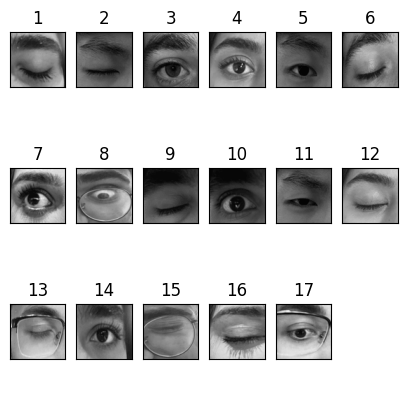

In [69]:
# Set subplot layout and size
fig, axs = plt.subplots(3, 6, figsize=(5, 5), subplot_kw={'xticks': [], 'yticks': []})

# Plot the images using matplotlib
for i, ax in enumerate(axs.flat):
    if i < len(images):
        ax.imshow(images[i])
        ax.set_title(f"{i+1}")
    else:
        ax.axis('off')
plt.show()

In [70]:
# Manually assign labels
labels = [0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1]
labels = np.asarray(labels)

In [71]:
images.shape

(17, 80, 80, 3)

In [72]:
labels.shape

(17,)

In [73]:
model = keras.models.load_model('drive/My Drive/Apply AI')

In [74]:
test_loss, test_acc = model.evaluate(images,  labels, verbose=2)

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 - 0s - loss: 0.1125 - accuracy: 0.9412 - 285ms/epoch - 285ms/step


In [75]:
print(test_acc)

0.9411764740943909


In [76]:
predictions = model.predict(images)
predictions_binary = (predictions > 0.5).astype(int)

1/1 [==============================] - 0s 243ms/step


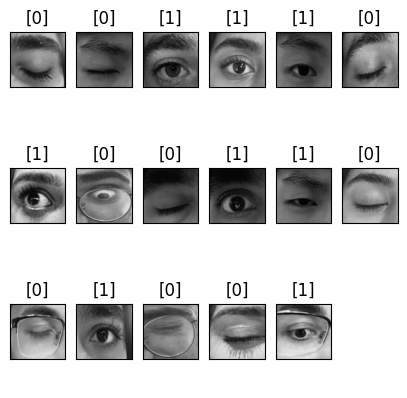

In [77]:
# Set subplot layout and size
fig, axs = plt.subplots(3, 6, figsize=(5, 5), subplot_kw={'xticks': [], 'yticks': []})

# Plot the images and their predicted labels
for i, ax in enumerate(axs.flat):
    if i < len(images):
        ax.imshow(images[i])
        predicted_label = predictions_binary[i]
        ax.set_title(f"{predicted_label}")
    else:
        ax.axis('off')
plt.show()

In [78]:
# Precision, Recall, F1 Score
precision, recall, f1_score, _ = precision_recall_fscore_support(labels, predictions_binary)
print(precision)
print(recall)
print(f1_score)

[0.88888889 1.        ]
[1.         0.88888889]
[0.94117647 0.94117647]


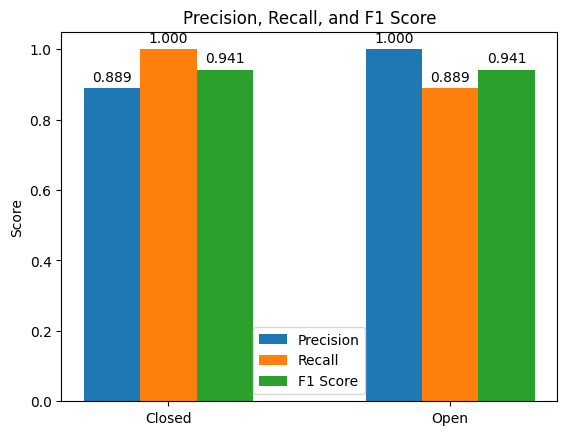

In [79]:
# Create bar plot for precision, recall, and F1 score
labels = ['Closed', 'Open']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add labels, title, and legend to the plot
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add the actual scores as text on top of each bar
for rect1, rect2, rect3 in zip(rects1, rects2, rects3):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    height3 = rect3.get_height()
    ax.annotate('{:.3f}'.format(height1),
                xy=(rect1.get_x() + rect1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
    ax.annotate('{:.3f}'.format(height2),
                xy=(rect2.get_x() + rect2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')
    ax.annotate('{:.3f}'.format(height3),
                xy=(rect3.get_x() + rect3.get_width() / 2, height3),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom')

plt.show()